### Figure Plan

I need a plan for how I'm going to make figures. It needs to be easily reproducible, and I'd like it to be push-button wrt changes. Two major options:

1) Make components in python, integrate in Illustrator.

2) Make entire figure in python

2 is hard but...I think it's a good idea. I'm goign to *try* this.

Beyond this: going to start by trying to put it together in a nice notebook...will consider converting to script later but a little unsure. Notebook is ok for now.


In [84]:
from importlib import reload
import flymovie as fm
from flymovie.simnuc import Sim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from importlib import reload
import umap
import scipy.ndimage as ndi
import skimage as ski
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Let's start with a figure to try things out on. Let's do the "prove our CNN does something useful figure"

In [8]:
figuredata_folder = '/Users/michaelstadler/Bioinformatics/Projects/rpb1/data/figuredata'
matched_embedding_file = 'embeddings__real-nuclei-set3-matched-20220630__20220619-plussims-20220616-realreal.pkl'

In [180]:
filepath_protein_separation = os.path.join(figuredata_folder, 'protein_separation.png')
filepath_zld_temp_prog = os.path.join(figuredata_folder, 'zld_temporal_progression.png')

filepath_rpb1_temp_prog = os.path.join(figuredata_folder, 'rpb1_temporal_progression.png')

In [151]:
def plot_protein_separation(embed_pkl_file):
    embedding, names = fm.load_pickle(os.path.join(figuredata_folder, embed_pkl_file))
    reducer = umap.UMAP(n_components=2, target_n_neighbors=20)
    embedding_u = reducer.fit_transform(embedding)
    df = pd.DataFrame(embedding_u)
    df['names'] = names
    splits = df['names'].str.split('_', expand=True)
    df['sample'] = splits[0]
    df['stage'] = splits[1]
    for l in ['zld-wt', 'h2b', 'rpb1']:
        df_l = df.loc[df['sample'] == l]
        plt.scatter(df_l[0], df_l[1], alpha=0.5)
    plt.xlabel('')
    plt.ylabel('')
    plt.legend(title='', loc='upper left', labels=['Zld', 'H2b', 'Rpb1'])
    return df

In [142]:
# Independent umap.

def plot_temporal_progression(embed_pkl_file, sampleID, n_neighbors=15, min_dist=0.5):
    embedding, names = fm.load_pickle(os.path.join(figuredata_folder, embed_pkl_file))
    labels = pd.Series(names).str.split('_', expand=True)
    
    embedding = embedding[labels[0] == sampleID]
    labels = labels[labels[0] == sampleID]
    reducer = umap.UMAP(n_components=2, n_neighbors=n_neighbors, min_dist=min_dist)
    embedding_u = reducer.fit_transform(embedding)

    splits = labels[1].str.split('-', expand=True)
    splits.columns = ['sample', 'nc', 'mins']
    
    df = pd.DataFrame(embedding_u)
    df['nc'] = splits['nc'].values
    df['mins'] = splits['mins'].values.astype(int)

    ncs = df['nc'].unique()
    cmaps = ['Greens', 'Oranges', 'Purples']
    for i in range(len(ncs)):
        nc = ncs[i]
        cmap = cmaps[i]
        df_nc = df.loc[df['nc'] == nc]
        sns.scatterplot(data=df_nc, x=0, y=1, hue='mins', palette=cmap, legend=False)
        plt.xlabel('')
        plt.ylabel('')


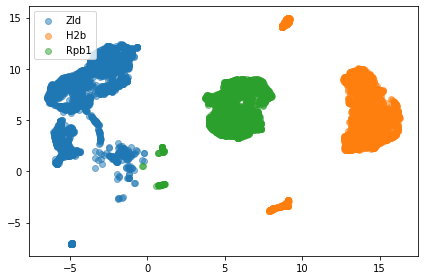

In [194]:
df = plot_protein_separation(matched_embedding_file)
plt.tight_layout()
plt.savefig(os.path.join(figuredata_folder, 'protein_separation.png'), dpi=300)


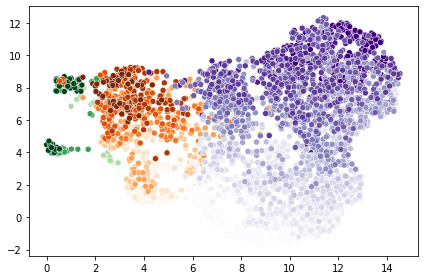

In [196]:
plot_temporal_progression(matched_embedding_file, 'zld-wt', n_neighbors=40, min_dist=0.5) 
plt.tight_layout()
plt.savefig(filepath_zld_temp_prog, dpi=300)


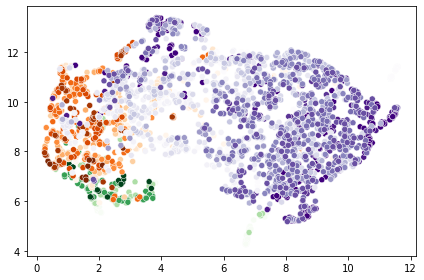

In [200]:
plot_temporal_progression(matched_embedding_file, 'rpb1', min_dist=0.1)  
plt.tight_layout()
plt.savefig(filepath_rpb1_temp_prog, dpi=300)

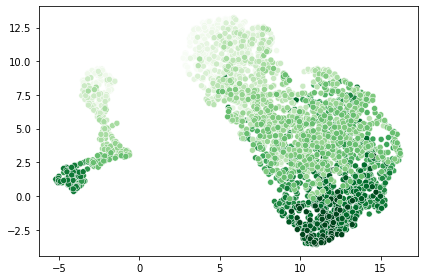

In [197]:
plot_temporal_progression(matched_embedding_file, 'h2b', min_dist=0.5)  
plt.tight_layout()
plt.savefig(os.path.join(figuredata_folder, 'h2b_temporal_progression.png'), dpi=300)

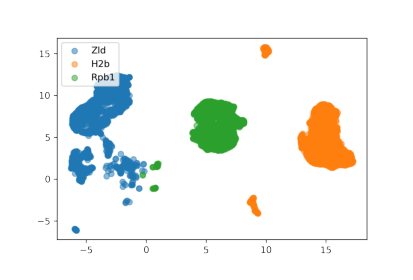

In [158]:
import matplotlib.image as mpimg
img = mpimg.imread(filepath_protein_separation)
imgplot = plt.imshow(img)
plt.axis('off')
plt.tight_layout()

/var/folders/46/dftvy0sd0jv10kyqlkqc2d8m0000gn/T/ipykernel_24042/546266660.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


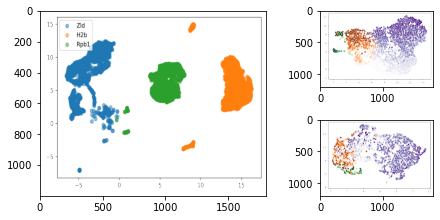

In [214]:
fig = plt.figure(constrained_layout=True, facecolor='1')
gs = fig.add_gridspec(nrows=3, ncols=3, left=0.05, right=0.75,
                      hspace=0.0, wspace=0.15)
ax0 = fig.add_subplot(gs[:-1, :-1])
img = mpimg.imread(filepath_protein_separation)
ax0.imshow(img, aspect='auto')
#ax0.axis('off')

ax1 = fig.add_subplot(gs[0, 2])
img = mpimg.imread(filepath_zld_temp_prog)
ax1.imshow(img, aspect='auto')
#ax1.axis('off')

ax2 = fig.add_subplot(gs[1, 2])
img = mpimg.imread(filepath_rpb1_temp_prog)
ax2.imshow(img, aspect='auto')
#ax2.axis('off')


plt.tight_layout()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df[0],df[1],df[2])